In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

In [2]:
# Activities are the class labels
# It is a 6 class classification
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}

# Utility function to print the confusion matrix
def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

### Data

In [3]:
# Data directory
DATADIR = 'UCI_HAR_Dataset'

In [4]:
# Utility function to read the data from csv file
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

#### Loading X_train and X_test

In [5]:
#Loading the train data for X_train
tr_1 = 'UCI_HAR_Dataset/train/Inertial Signals/body_acc_x_train.txt'
tr_2 = 'UCI_HAR_Dataset/train/Inertial Signals/body_acc_y_train.txt'
tr_3 = 'UCI_HAR_Dataset/train/Inertial Signals/body_acc_z_train.txt'
tr_4 = 'UCI_HAR_Dataset/train/Inertial Signals/body_gyro_x_train.txt'
tr_5 = 'UCI_HAR_Dataset/train/Inertial Signals/body_gyro_y_train.txt'
tr_6 = 'UCI_HAR_Dataset/train/Inertial Signals/body_gyro_z_train.txt'
tr_7 = 'UCI_HAR_Dataset/train/Inertial Signals/total_acc_x_train.txt'
tr_8 = 'UCI_HAR_Dataset/train/Inertial Signals/total_acc_y_train.txt'
tr_9 = 'UCI_HAR_Dataset/train/Inertial Signals/total_acc_z_train.txt'

In [6]:
signals_data = []

signals_data.append(_read_csv(tr_1).as_matrix())
signals_data.append(_read_csv(tr_2).as_matrix())
signals_data.append(_read_csv(tr_3).as_matrix())
signals_data.append(_read_csv(tr_4).as_matrix())
signals_data.append(_read_csv(tr_5).as_matrix())
signals_data.append(_read_csv(tr_6).as_matrix())
signals_data.append(_read_csv(tr_7).as_matrix())
signals_data.append(_read_csv(tr_8).as_matrix())
signals_data.append(_read_csv(tr_9).as_matrix())

In [7]:
# Transpose is used to change the dimensionality of the output,
# aggregating the signals by combination of sample/timestep.
# Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
X_train = np.transpose(signals_data, (1, 2, 0))

In [8]:
print(len(X_train))
print(len(X_train[0]))
print(len(X_train[0][0]))

7352
128
9


In [9]:
#Loading the train data for X_test
ts_1 = 'UCI_HAR_Dataset/test/Inertial Signals/body_acc_x_test.txt'
ts_2 = 'UCI_HAR_Dataset/test/Inertial Signals/body_acc_y_test.txt'
ts_3 = 'UCI_HAR_Dataset/test/Inertial Signals/body_acc_z_test.txt'
ts_4 = 'UCI_HAR_Dataset/test/Inertial Signals/body_gyro_x_test.txt'
ts_5 = 'UCI_HAR_Dataset/test/Inertial Signals/body_gyro_y_test.txt'
ts_6 = 'UCI_HAR_Dataset/test/Inertial Signals/body_gyro_z_test.txt'
ts_7 = 'UCI_HAR_Dataset/test/Inertial Signals/total_acc_x_test.txt'
ts_8 = 'UCI_HAR_Dataset/test/Inertial Signals/total_acc_y_test.txt'
ts_9 = 'UCI_HAR_Dataset/test/Inertial Signals/total_acc_z_test.txt'

In [10]:
Xtest_signalsdata = []

Xtest_signalsdata.append(_read_csv(ts_1).as_matrix())
Xtest_signalsdata.append(_read_csv(ts_2).as_matrix())
Xtest_signalsdata.append(_read_csv(ts_3).as_matrix())
Xtest_signalsdata.append(_read_csv(ts_4).as_matrix())
Xtest_signalsdata.append(_read_csv(ts_5).as_matrix())
Xtest_signalsdata.append(_read_csv(ts_6).as_matrix())
Xtest_signalsdata.append(_read_csv(ts_7).as_matrix())
Xtest_signalsdata.append(_read_csv(ts_8).as_matrix())
Xtest_signalsdata.append(_read_csv(ts_9).as_matrix())

In [11]:
X_test = np.transpose(Xtest_signalsdata, (1, 2, 0))

In [12]:
print(len(X_test))
print(len(X_test[0]))
print(len(X_test[0][0]))

2947
128
9


#### Loading y_train and y_test

In [13]:
#Loading the train data for y_train
y_tr = 'UCI_HAR_Dataset/train/y_train.txt'

In [14]:
y = _read_csv(y_tr)[0]

In [15]:
y_train = pd.get_dummies(y).as_matrix()

In [16]:
len(y_train)

7352

In [17]:
#Loading the train data for y_test
y_tst = 'UCI_HAR_Dataset/test/y_test.txt'

In [18]:
y_tst = _read_csv(y_tst)[0]

In [19]:
y_test = pd.get_dummies(y_tst).as_matrix()

In [20]:
len(y_test)

2947

In [21]:
# Importing tensorflow
np.random.seed(42)
import tensorflow as tf
tf.set_random_seed(42)

In [22]:
# Configuring a session
session_conf = tf.ConfigProto(
    intra_op_parallelism_threads=1,
    inter_op_parallelism_threads=1
)

In [23]:
# Import Keras
from keras import backend as K
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

Using TensorFlow backend.


In [25]:
# Importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout

In [26]:
# Utility function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [27]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(y_train)

print(timesteps)
print(input_dim)
print(len(X_train))

128
9
7352


### 1. LSTM with one layer

In [28]:
# Initializing parameters
epochs = 30
batch_size = 16
n_hidden = 32

In [29]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                5376      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 198       
Total params: 5,574
Trainable params: 5,574
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [40]:
# Training the model
model_1 = model.fit(X_train, y_train, batch_size=batch_size, validation_data=(X_test, y_test), epochs=epochs)
score = model.evaluate(X_test, y_test)
print("Accuracy: %.2f%%" % (score[1]*100))

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 53s 7ms/step - loss: 0.1677 - acc: 0.9491 - val_loss: 0.3217 - val_acc: 0.9108
Epoch 2/30
7352/7352 [==============================] - 51s 7ms/step - loss: 0.1604 - acc: 0.9494 - val_loss: 0.4382 - val_acc: 0.9084
Epoch 3/30
7352/7352 [==============================] - 52s 7ms/step - loss: 0.1540 - acc: 0.9494 - val_loss: 0.4220 - val_acc: 0.9131
Epoch 4/30
7352/7352 [==============================] - 51s 7ms/step - loss: 0.1719 - acc: 0.9478 - val_loss: 0.4104 - val_acc: 0.9182
Epoch 5/30
7352/7352 [==============================] - 53s 7ms/step - loss: 0.1446 - acc: 0.9483 - val_loss: 0.3718 - val_acc: 0.9101
Epoch 6/30
7352/7352 [==============================] - 52s 7ms/step - loss: 0.1451 - acc: 0.9489 - val_loss: 0.4547 - val_acc: 0.8975
Epoch 7/30
7352/7352 [==============================] - 53s 7ms/step - loss: 0.1480 - acc: 0.9501 - val_loss: 0.4265 - val_acc: 0.9050
Epoch 8

In [41]:
# Confusion Matrix
print(confusion_matrix(y_test, model.predict(X_test)))

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 537        0         0        0                   0   
SITTING                  0      418        72        0                   1   
STANDING                 0      111       420        1                   0   
WALKING                  0        0         0      472                  24   
WALKING_DOWNSTAIRS       0        0         0        9                 407   
WALKING_UPSTAIRS         0        0         0       28                   1   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            0  
STANDING                           0  
WALKING                            0  
WALKING_DOWNSTAIRS                 4  
WALKING_UPSTAIRS                 442  


In [34]:
import matplotlib.pyplot as plt
import time

#this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):    
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

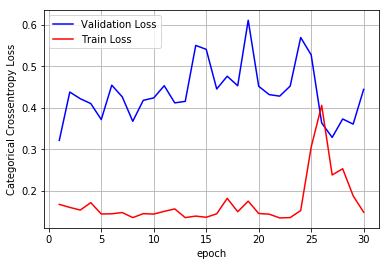

In [43]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,31))

vy = model_1.history['val_loss']
ty = model_1.history['loss']
plt_dynamic(x, vy, ty, ax)

## 2. LSTM with one layer(48 units)

In [30]:
model = Sequential()
model.add(LSTM(48, input_shape=(timesteps, input_dim)))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 48)                11136     
_________________________________________________________________
dropout_2 (Dropout)          (None, 48)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 294       
Total params: 11,430
Trainable params: 11,430
Non-trainable params: 0
_________________________________________________________________


In [31]:
model_2 = model.fit(X_train, y_train, batch_size=16, validation_data=(X_test, y_test), epochs=30)
score = model.evaluate(X_test, y_test)
print("Accuracy: %.2f%%" % (score[1]*100))

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 59s 8ms/step - loss: 1.2611 - acc: 0.4713 - val_loss: 1.1306 - val_acc: 0.5490
Epoch 2/30
7352/7352 [==============================] - 57s 8ms/step - loss: 1.0592 - acc: 0.5502 - val_loss: 0.9163 - val_acc: 0.6189
Epoch 3/30
7352/7352 [==============================] - 57s 8ms/step - loss: 0.8463 - acc: 0.6113 - val_loss: 0.8728 - val_acc: 0.6223
Epoch 4/30
7352/7352 [==============================] - 57s 8ms/step - loss: 0.7502 - acc: 0.6439 - val_loss: 0.7714 - val_acc: 0.6128
Epoch 5/30
7352/7352 [==============================] - 57s 8ms/step - loss: 0.6987 - acc: 0.6676 - val_loss: 0.8003 - val_acc: 0.6464
Epoch 6/30
7352/7352 [==============================] - 57s 8ms/step - loss: 0.5929 - acc: 0.7444 - val_loss: 0.7015 - val_acc: 0.7431
Epoch 7/30
7352/7352 [==============================] - 57s 8ms/step - loss: 0.4930 - acc: 0.8368 - val_loss: 0.6798 - val_acc: 0.7710
Epoch 8

In [32]:
print(confusion_matrix(y_test, model.predict(X_test)))

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 537        0         0        0                   0   
SITTING                  0      406        85        0                   0   
STANDING                 0      109       422        1                   0   
WALKING                  0        0         0      469                  21   
WALKING_DOWNSTAIRS       0        1         0        1                 415   
WALKING_UPSTAIRS         1        2         0       10                  38   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            0  
STANDING                           0  
WALKING                            6  
WALKING_DOWNSTAIRS                 3  
WALKING_UPSTAIRS                 420  


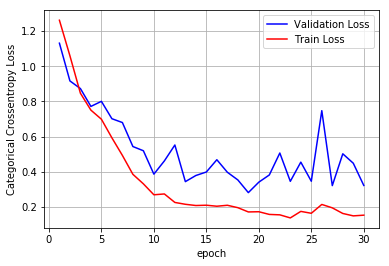

In [35]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,31))

vy = model_2.history['val_loss']
ty = model_2.history['loss']
plt_dynamic(x, vy, ty, ax)

## 3. LSTM with one layer(64 units)

In [41]:
model = Sequential()
model.add(LSTM(64, input_shape=(timesteps, input_dim)))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 64)                18944     
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 390       
Total params: 19,334
Trainable params: 19,334
Non-trainable params: 0
_________________________________________________________________


In [39]:
model_3 = model.fit(X_train, y_train, batch_size=16, validation_data=(X_test, y_test), epochs=30)
score = model.evaluate(X_test, y_test)
print("Accuracy: %.2f%%" % (score[1]*100))

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 62s 8ms/step - loss: 1.2523 - acc: 0.4600 - val_loss: 1.2109 - val_acc: 0.4744
Epoch 2/30
7352/7352 [==============================] - 60s 8ms/step - loss: 1.0148 - acc: 0.5588 - val_loss: 0.9561 - val_acc: 0.5813
Epoch 3/30
7352/7352 [==============================] - 59s 8ms/step - loss: 0.7756 - acc: 0.6483 - val_loss: 0.8169 - val_acc: 0.6403
Epoch 4/30
7352/7352 [==============================] - 60s 8ms/step - loss: 0.7094 - acc: 0.6972 - val_loss: 0.7666 - val_acc: 0.7082
Epoch 5/30
7352/7352 [==============================] - 60s 8ms/step - loss: 0.6231 - acc: 0.7470 - val_loss: 0.6421 - val_acc: 0.7574
Epoch 6/30
7352/7352 [==============================] - 60s 8ms/step - loss: 0.5116 - acc: 0.8168 - val_loss: 0.6577 - val_acc: 0.7950
Epoch 7/30
7352/7352 [==============================] - 59s 8ms/step - loss: 0.3916 - acc: 0.8724 - val_loss: 0.4703 - val_acc: 0.8548
Epoch 8

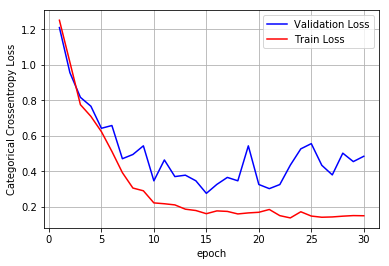

In [44]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,31))

vy = model_3.history['val_loss']
ty = model_3.history['loss']
plt_dynamic(x, vy, ty, ax)

## 4. LSTM with one layer(32 units and 0.6 droupout)

In [45]:
model = Sequential()
model.add(LSTM(32, input_shape=(timesteps, input_dim)))
model.add(Dropout(0.6))
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 32)                5376      
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 198       
Total params: 5,574
Trainable params: 5,574
Non-trainable params: 0
_________________________________________________________________


In [46]:
model_4 = model.fit(X_train, y_train, batch_size=16, validation_data=(X_test, y_test), epochs=30)
score = model.evaluate(X_test, y_test)
print("Accuracy: %.2f%%" % (score[1]*100))

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 60s 8ms/step - loss: 1.4050 - acc: 0.3878 - val_loss: 1.2862 - val_acc: 0.4140
Epoch 2/30
7352/7352 [==============================] - 57s 8ms/step - loss: 1.1704 - acc: 0.4759 - val_loss: 1.1453 - val_acc: 0.4591
Epoch 3/30
7352/7352 [==============================] - 57s 8ms/step - loss: 1.0419 - acc: 0.5201 - val_loss: 1.0457 - val_acc: 0.4961
Epoch 4/30
7352/7352 [==============================] - 57s 8ms/step - loss: 0.8817 - acc: 0.6011 - val_loss: 0.7875 - val_acc: 0.6176
Epoch 5/30
7352/7352 [==============================] - 58s 8ms/step - loss: 0.8254 - acc: 0.6283 - val_loss: 0.9886 - val_acc: 0.5433
Epoch 6/30
7352/7352 [==============================] - 58s 8ms/step - loss: 0.8633 - acc: 0.6232 - val_loss: 0.7438 - val_acc: 0.6379
Epoch 7/30
7352/7352 [==============================] - 57s 8ms/step - loss: 0.7154 - acc: 0.6741 - val_loss: 0.7224 - val_acc: 0.6318
Epoch 8

In [47]:
print(confusion_matrix(y_test, model.predict(X_test)))

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 537        0         0        0                   0   
SITTING                  1      370       107        4                   2   
STANDING                 0       60       454       13                   3   
WALKING                  0        0         0      485                   8   
WALKING_DOWNSTAIRS       0        0         0       57                 353   
WALKING_UPSTAIRS         0        1         0       27                  18   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            7  
STANDING                           2  
WALKING                            3  
WALKING_DOWNSTAIRS                10  
WALKING_UPSTAIRS                 425  


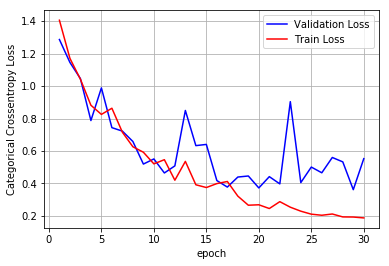

In [48]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,31))

vy = model_4.history['val_loss']
ty = model_4.history['loss']
plt_dynamic(x, vy, ty, ax)

## 5. LSTM with one layer(64 units and 0.6 droupout)

In [49]:
model = Sequential()
model.add(LSTM(64, input_shape=(timesteps, input_dim)))
model.add(Dropout(0.6))
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 64)                18944     
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 390       
Total params: 19,334
Trainable params: 19,334
Non-trainable params: 0
_________________________________________________________________


In [50]:
model_5 = model.fit(X_train, y_train, batch_size=16, validation_data=(X_test, y_test), epochs=30)
score = model.evaluate(X_test, y_test)
print("Accuracy: %.2f%%" % (score[1]*100))

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 63s 9ms/step - loss: 1.2983 - acc: 0.4444 - val_loss: 1.1276 - val_acc: 0.5025
Epoch 2/30
7352/7352 [==============================] - 61s 8ms/step - loss: 0.9231 - acc: 0.6019 - val_loss: 0.9085 - val_acc: 0.6071
Epoch 3/30
7352/7352 [==============================] - 62s 8ms/step - loss: 0.7759 - acc: 0.6617 - val_loss: 0.7794 - val_acc: 0.7106
Epoch 4/30
7352/7352 [==============================] - 62s 8ms/step - loss: 0.6972 - acc: 0.7248 - val_loss: 0.6667 - val_acc: 0.7679
Epoch 5/30
7352/7352 [==============================] - 61s 8ms/step - loss: 0.5776 - acc: 0.8011 - val_loss: 0.5448 - val_acc: 0.8219
Epoch 6/30
7352/7352 [==============================] - 62s 8ms/step - loss: 0.4214 - acc: 0.8747 - val_loss: 0.6507 - val_acc: 0.8191
Epoch 7/30
7352/7352 [==============================] - 61s 8ms/step - loss: 0.3039 - acc: 0.9097 - val_loss: 0.5006 - val_acc: 0.8609
Epoch 8

In [51]:
print(confusion_matrix(y_test, model.predict(X_test)))

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 513        3         0        0                   0   
SITTING                  0      416        72        0                   0   
STANDING                 0      114       415        3                   0   
WALKING                  0        0         1      469                  25   
WALKING_DOWNSTAIRS       0        0         0       11                 409   
WALKING_UPSTAIRS         0        3         1       27                  16   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                            21  
SITTING                            3  
STANDING                           0  
WALKING                            1  
WALKING_DOWNSTAIRS                 0  
WALKING_UPSTAIRS                 424  


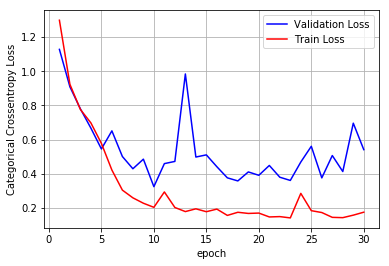

In [52]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,31))

vy = model_5.history['val_loss']
ty = model_5.history['loss']
plt_dynamic(x, vy, ty, ax)

## 6. LSTM with two layers(0.75 droupout)

In [56]:
model = Sequential()
#Layer_1
model.add(LSTM(64, return_sequences=True, input_shape=(timesteps, input_dim)))
model.add(Dropout(0.75))
#Layer_2
model.add(LSTM(32))
model.add(Dropout(0.75))
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 128, 64)           18944     
_________________________________________________________________
dropout_12 (Dropout)         (None, 128, 64)           0         
_________________________________________________________________
lstm_16 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_13 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 198       
Total params: 31,558
Trainable params: 31,558
Non-trainable params: 0
_________________________________________________________________


In [58]:
model_6 = model.fit(X_train, y_train, batch_size=128, validation_data=(X_test, y_test), epochs=30)
score = model.evaluate(X_test, y_test)
print("Accuracy: %.2f%%" % (score[1]*100))

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 24s 3ms/step - loss: 1.2402 - acc: 0.5011 - val_loss: 1.1058 - val_acc: 0.5677
Epoch 2/30
7352/7352 [==============================] - 24s 3ms/step - loss: 1.1066 - acc: 0.5431 - val_loss: 0.9819 - val_acc: 0.6549
Epoch 3/30
7352/7352 [==============================] - 24s 3ms/step - loss: 1.0185 - acc: 0.5698 - val_loss: 0.8902 - val_acc: 0.6702
Epoch 4/30
7352/7352 [==============================] - 24s 3ms/step - loss: 0.9626 - acc: 0.5705 - val_loss: 0.8544 - val_acc: 0.6254
Epoch 5/30
7352/7352 [==============================] - 24s 3ms/step - loss: 0.9081 - acc: 0.5958 - val_loss: 0.8031 - val_acc: 0.6512
Epoch 6/30
7352/7352 [==============================] - 24s 3ms/step - loss: 0.8665 - acc: 0.6062 - val_loss: 0.7871 - val_acc: 0.6882
Epoch 7/30
7352/7352 [==============================] - 24s 3ms/step - loss: 0.8739 - acc: 0.6186 - val_loss: 1.2496 - val_acc: 0.5314
Epoch 8

In [59]:
print(confusion_matrix(y_test, model.predict(X_test)))

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 510        0         0        0                   0   
SITTING                  6      382        99        4                   0   
STANDING                 0       78       453        1                   0   
WALKING                  0        0         0      467                  16   
WALKING_DOWNSTAIRS       0        0         0       15                 370   
WALKING_UPSTAIRS         0        0         0       35                  43   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                            27  
SITTING                            0  
STANDING                           0  
WALKING                           13  
WALKING_DOWNSTAIRS                35  
WALKING_UPSTAIRS                 393  


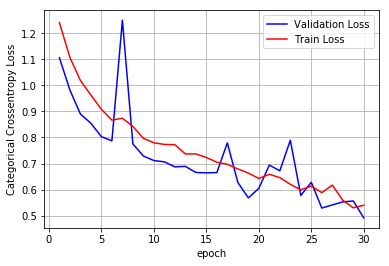

In [60]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,31))

vy = model_6.history['val_loss']
ty = model_6.history['loss']
plt_dynamic(x, vy, ty, ax)

# Conclusion

1. Initially, we had two types of data. One with the expert engineering features and the other one is raw data.
2. We've taken the raw data to apply Deep Learning models like LSTM, which is a type of RNN, on top of it.
3. We've converted the raw data into 128 dimenssions vector from the 9 time series raw data of accelerometer and gyroscope readings.
4. Later, we've tried various architechtures with different units, dropouts and layers of the LSTM networks on the Raw data.
5. Even though we don't have a huge data, with the limited data we had, we got to see a best accuracy of 91.48% which is pretty good.